In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
from sklearn.model_selection import train_test_split

In [30]:
# Fetch data for Google stock
google = yf.Ticker("GOOG")
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)

In [31]:
# Prepare data for training
X = np.arange(len(df)).reshape(-1, 1)
y = df['Low'].values

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

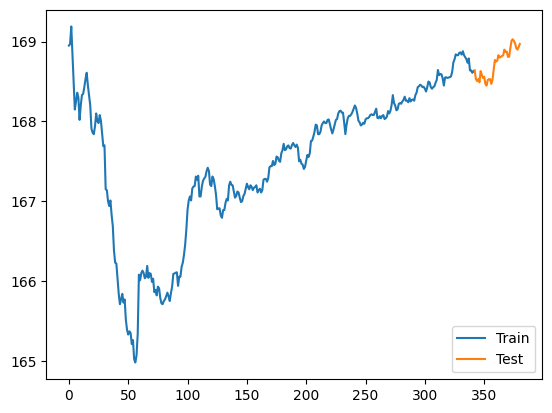

In [33]:
# Plot training and testing data
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [38]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Create a logistic regression model
model = LinearRegression()
# Fit the model
with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning)
    try:
        model.fit(X_train, y_train)
    except ConvergenceWarning:
        print("ConvergenceWarning: Maximum number of iterations exceeded")
# Evaluate the model
score = model.score(X, y)
print("Model score:", score)

predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print("Model R^2 score:", score)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Model score: 0.5048071411297378
Model R^2 score: 0.4085269289133593
Root Mean Squared Error (RMSE): 0.14075463945809605
